In [85]:
from pinntorch import *
from matplotlib.ticker import FuncFormatter
import matplotlib
import h5py
from matplotlib.transforms import Bbox

In [156]:
def custom_color_normalize(value):
    return value**80

def log_tick_formatter(val, pos):
    #print(val)
    #print(show_alphas_scaled[1])
    #print(np.isclose(val, show_alphas_scaled[1]))
    #print()
    if np.isclose(val**(1./80.), show_alphas_scaled).any():
        #show_val = custom_color_normalize(val)
        #print('is in')
        if val == 1.0:
            return f"({val**(1./80.):.5f})"
        return f"{val**(1./80.):.5f}"
    return ""
    
def find_last_threshold_index(physics, validation, threshold = 0.0):
    over = (validation - physics) > threshold
    reversed_arr = np.flipud(over)
    index = len(over) - np.where(reversed_arr == False)[0][0] - 1
    return index

def plot_pareto_front(L_D, L_P, data_color):
    cmap = matplotlib.colormaps['jet']
    plt.figure(figsize=(5,4))
    low_noise_points = plt.scatter(L_D, L_P, c=custom_color_normalize(data_color), cmap=cmap)  # Use 'viridis' colormap, but you can choose any other
    # Add colorbar for the z values
    cbar_lown = plt.colorbar(low_noise_points, ticks=custom_color_normalize(np.concatenate(([1.0], data_color))), format=FuncFormatter(tick_formatter))
    #cbar_lown.ax.set_title('$var =$ 0.1')
    cbar_lown.set_label(r' $α$ (log scaled)', fontsize=13)
    
    plt.ylabel(r"$\mathcal{L}_\mathrm{PHYSICS}$", loc='center', fontsize=13)
    plt.xlabel(r"$\mathcal{L}_\mathrm{DATA}$", loc='center', fontsize=13)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.grid()

    bbox_instance = Bbox.from_bounds(0.1, -0.1, 5.2, 3.8)

    plt.savefig('../plots/heat_L5k1_pareto_normal.png', dpi=600, bbox_inches=bbox_instance)
    plt.show()

def get_best_indices(physics, validation, threshold):
    best_indices = []
    for i in range(len(physics)):
        best_indices.append(find_last_threshold_index(physics[i], validation[i], threshold))
    return best_indices

In [157]:
def load_group_as_list(file_object, group_name):
    if type(file_object[group_name]) == h5py._hl.group.Group:
        return [np.array(file_object[group_name][str(i)]) for i, x in enumerate(file_object[group_name])]
    return np.array(file_object[group_name])

In [158]:
heat_L5_k1 = h5py.File('../data/2023-11-03/heat_k1_L5_50k_00/heat_k1_L5_50k.h5', 'r')

In [159]:
for key in heat_L5_k1:
    print(key)

LR
input_data
loss_data
loss_physics
loss_val
settings


In [160]:
heat_L5_k1_data = load_group_as_list(heat_L5_k1, 'loss_data')
heat_L5_k1_physics = load_group_as_list(heat_L5_k1, 'loss_physics')
heat_L5_k1_val = load_group_as_list(heat_L5_k1, 'loss_val')

In [161]:
alphas = np.array(heat_L5_k1['settings']['alphas'])
print(alphas)

[0.9998438  0.99975216 0.9996069  0.99937654 0.99901116 0.9984316
 0.99751246 0.99605453 0.99374217 0.99007463 0.9842575  0.9750312
 0.9603974  0.93718714 0.90037376 0.84198475 0.7493751  0.6024887
 0.369515   0.        ]


In [162]:
best_indices_none = get_best_indices(heat_L5_k1_physics, heat_L5_k1_val, 0.2)

In [163]:
physics_heat_pareto = [heat_L5_k1_physics[i][-1] for i in range(len(heat_L5_k1_physics))]
data_heat_pareto = [heat_L5_k1_data[i][-1] for i in range(len(heat_L5_k1_data))]
#best_indices_none[i]

In [164]:
def tick_formatter(val, pos):
    skip_indices = [1,2,3,5,15,16,17,18,19,20]  # Adjust the indices you want to skip
    if pos in skip_indices:
        return ''
    elif pos == 1:
        return '('+str(1.0)+')'
    return alphas[pos]

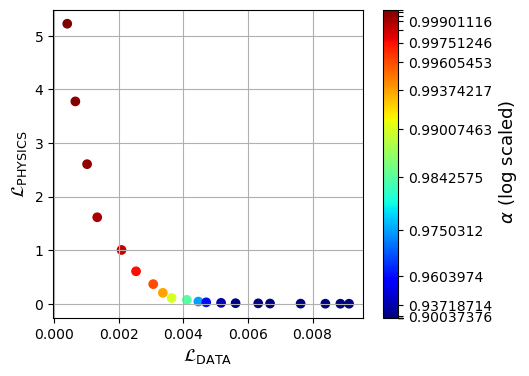

In [165]:
plot_pareto_front(data_heat_pareto, physics_heat_pareto, alphas)